In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"D:\support_tickets.csv")
df.head()


,issue_description,category,priority,Priority_Score,Resolution_Time_Hours,ticket_id,type,created_date,resolved_date,country,status
0,i am writing to report a significant problem w...,Technical Support,high,3,4,1,Incident,27-01-2024,27-01-2024 04:00,India,Resolved
1,i hope this message reaches you well i am reac...,Returns and Exchanges,medium,2,20,2,Incident,09-01-2024,09-01-2024 20:00,India,Resolved
2,i hope this message finds you well i am reachi...,Billing and Payments,low,1,66,3,Incident,25-01-2024,27-01-2024 18:00,India,Resolved
3,dear support teami hope this message reaches y...,Sales and Pre-Sales,medium,2,13,4,Incident,15-01-2024,15-01-2024 13:00,India,Resolved
4,dear customer supporti hope this message reach...,Technical Support,high,3,2,5,Incident,10-01-2024,10-01-2024 02:00,India,Resolved


In [10]:
def assign_ticket_type(category):
    category = str(category).lower()

    if "technical" in category or "it" in category or "security" in category or "bug" in category:
        return "Incident"
    elif "product" in category or "customer" in category or "sales" in category or "billing" in category:
        return "Request"
    else:
        return "Problem"

df["type"] = df["category"].apply(assign_ticket_type)
df["type"].value_counts()


type
Request     13923
Incident    12117
Problem      3611
Name: count, dtype: int64

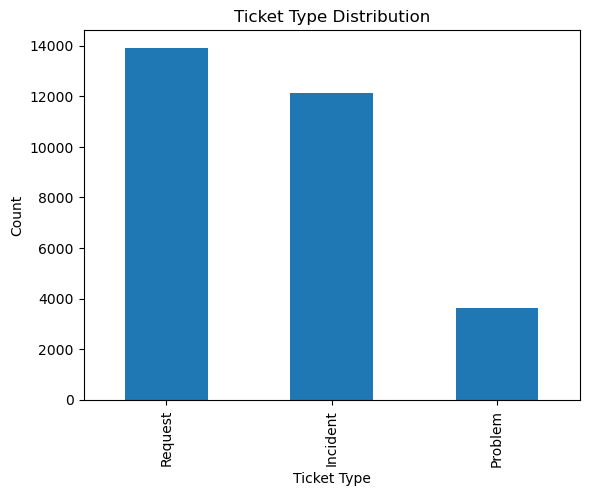

In [12]:
df["type"].value_counts().plot(kind="bar")
plt.title("Ticket Type Distribution")
plt.xlabel("Ticket Type")
plt.ylabel("Count")
plt.show()


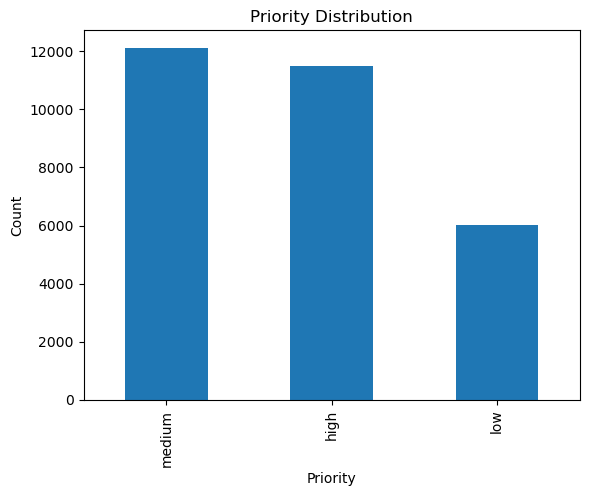

In [14]:
df["priority"].value_counts().plot(kind="bar")
plt.title("Priority Distribution")
plt.xlabel("Priority")
plt.ylabel("Count")
plt.show()


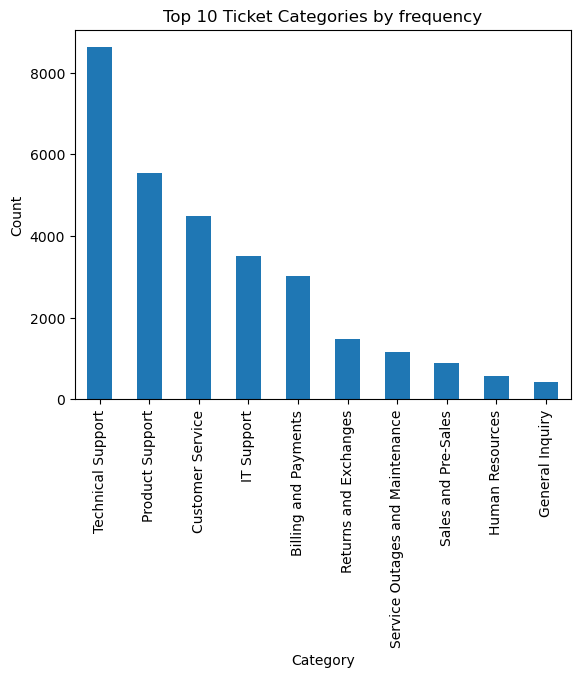

In [94]:
df["category"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Ticket Categories by frequency")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


In [104]:
df['Queue'] = 'General'


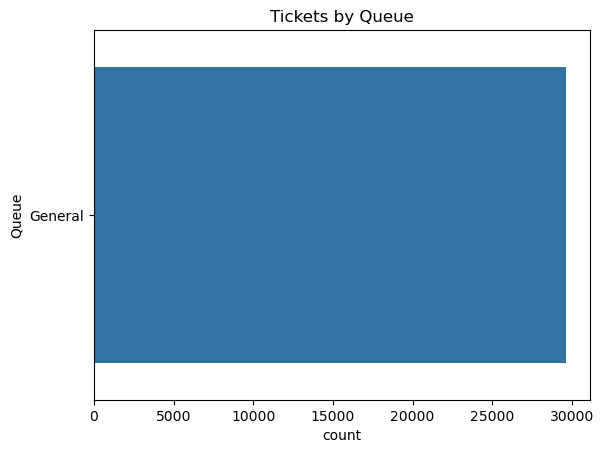

In [106]:
sns.countplot(data=df, y='Queue')
plt.title("Tickets by Queue")
plt.show()


In [112]:
df['Assigned_Team'] = 'Team-A'


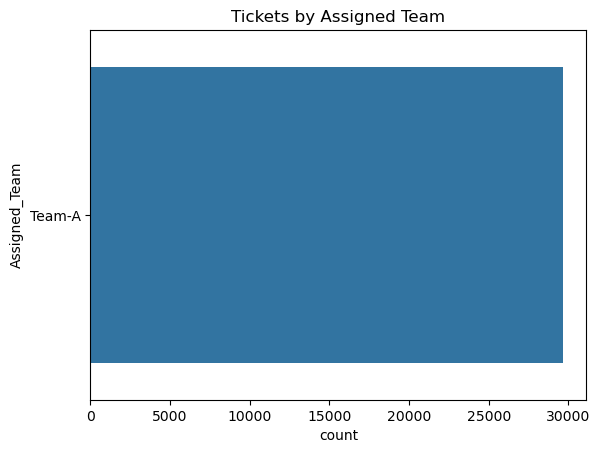

In [114]:
sns.countplot(data=df, y='Assigned_Team')
plt.title("Tickets by Assigned Team")
plt.show()


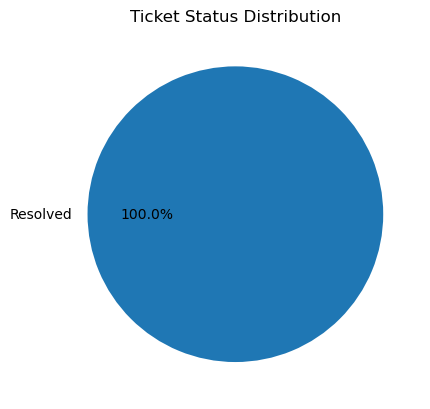

In [116]:
df['status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Ticket Status Distribution")
plt.ylabel("")
plt.show()


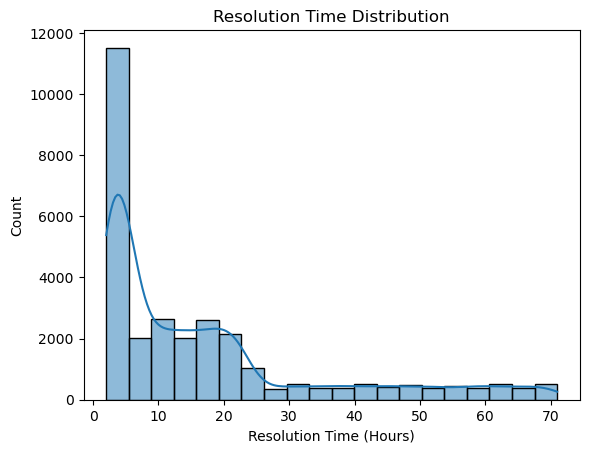

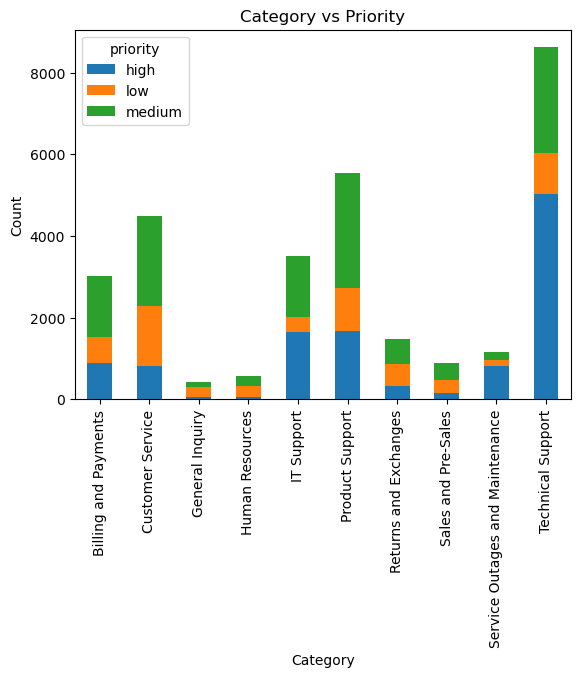

In [122]:
sns.histplot(df['Resolution_Time_Hours'], bins=20, kde=True)
plt.title("Resolution Time Distribution")
plt.xlabel("Resolution Time (Hours)")
plt.show()

pd.crosstab(df['category'], df['priority']).plot(kind='bar', stacked=True)
plt.title("Category vs Priority")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()



In [52]:
df.to_csv(r"D:\support_tickets_milestone2.csv", index=False)


In [54]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [58]:
le = LabelEncoder()
df['Category_Encoded'] = le.fit_transform(df['category'].fillna('Unknown'))


In [62]:
X = df[['Priority_Score', 'Resolution_Time_Hours', 'Category_Encoded']]
X = X.dropna()


In [64]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [66]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

df.loc[X.index, 'Cluster_ID'] = cluster_labels


In [68]:
distances = np.linalg.norm(
    X_scaled - kmeans.cluster_centers_[cluster_labels],
    axis=1
)

df.loc[X.index, 'Similarity_Score'] = 1 / (1 + distances)


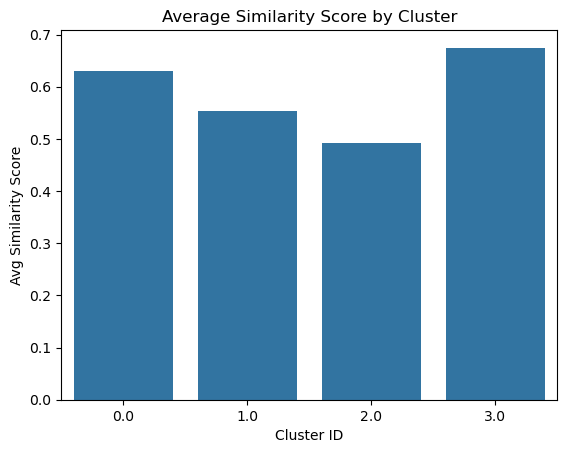

In [70]:
cluster_similarity = df.groupby('Cluster_ID')['Similarity_Score'].mean()

sns.barplot(x=cluster_similarity.index, y=cluster_similarity.values)
plt.title("Average Similarity Score by Cluster")
plt.xlabel("Cluster ID")
plt.ylabel("Avg Similarity Score")
plt.show()


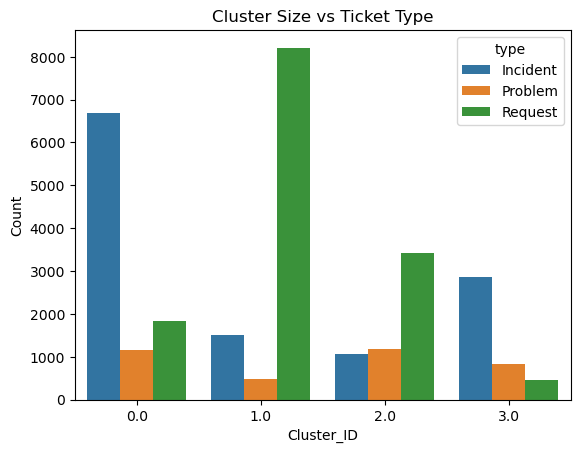

In [76]:
cluster_size = df.groupby(['Cluster_ID', 'type']).size().reset_index(name='Count')

sns.barplot(data=cluster_size, x='Cluster_ID', y='Count', hue='type')
plt.title("Cluster Size vs Ticket Type")
plt.show()


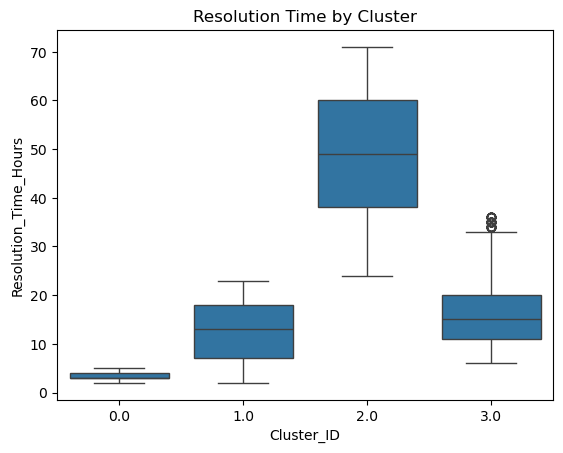

In [80]:
sns.boxplot(x='Cluster_ID', y='Resolution_Time_Hours', data=df)
plt.title("Resolution Time by Cluster")
plt.show()


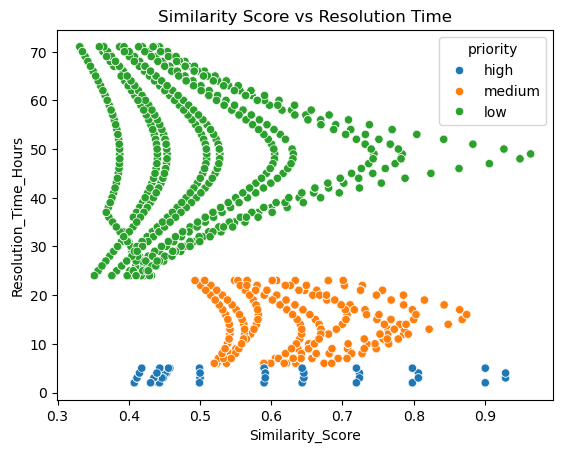

In [84]:
sns.scatterplot(x='Similarity_Score', y='Resolution_Time_Hours', hue='priority', data=df)
plt.title("Similarity Score vs Resolution Time")
plt.show()


In [86]:
cluster_perf = df.groupby('Cluster_ID')['Resolution_Time_Hours'].mean()
cluster_perf


Cluster_ID
0.0     3.500775
1.0    12.600609
2.0    48.732675
3.0    15.884718
Name: Resolution_Time_Hours, dtype: float64

In [92]:
df.to_csv(r"D:\support_tickets_with_clusters(milestone2).csv", index=False)
